In [1]:
import pandas as pd
import numpy as np
np.random.seed(0)
import os
import librosa as libr
import scipy.signal as signal 
import matplotlib.pyplot as plt
import gc
import IPython.display as ipd
import librosa.display 
import warnings
warnings.filterwarnings('ignore')

In [2]:
Bengali = 'Indian_Languages_Audio_Dataset/Bengali/'
Hindi = 'Indian_Languages_Audio_Dataset/Hindi/'
Gujarati = 'Indian_Languages_Audio_Dataset/Gujarati/'
Kannada = 'Indian_Languages_Audio_Dataset/Kannada/'
Malayalam = 'Indian_Languages_Audio_Dataset/Malayalam/'
Marathi = 'Indian_Languages_Audio_Dataset/Marathi/'
Punjabi = 'Indian_Languages_Audio_Dataset/Punjabi/'
Tamil = 'Indian_Languages_Audio_Dataset/Tamil/'
Telugu = 'Indian_Languages_Audio_Dataset/Telugu/'
Urdu = 'Indian_Languages_Audio_Dataset/Urdu/'

In [3]:
filename = '15.mp3'

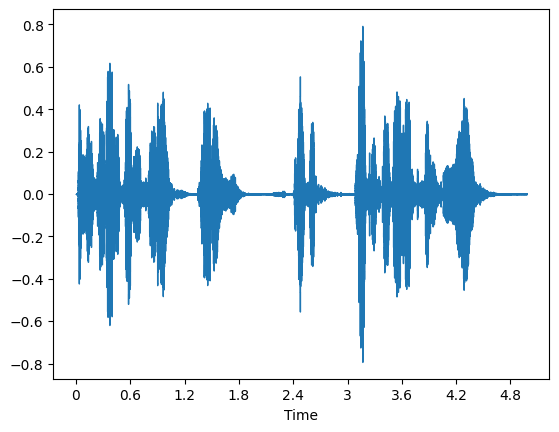

In [4]:
#import soundfile as sf
data,sample_rate=librosa.load(Hindi+filename)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename)

In [5]:
gc.collect()

4771

In [6]:
data.shape

(109831,)

In [7]:
data[:10]

array([ 4.1697379e-09,  1.6791555e-08,  5.0663540e-09,  5.6102087e-09,
        4.5516351e-09,  8.6028225e-09,  4.1070449e-09,  1.8132076e-09,
        2.3566238e-09, -2.8929432e-09], dtype=float32)

In [8]:
sample_rate

22050

Text(0.5, 0, 'Time(Hz)')

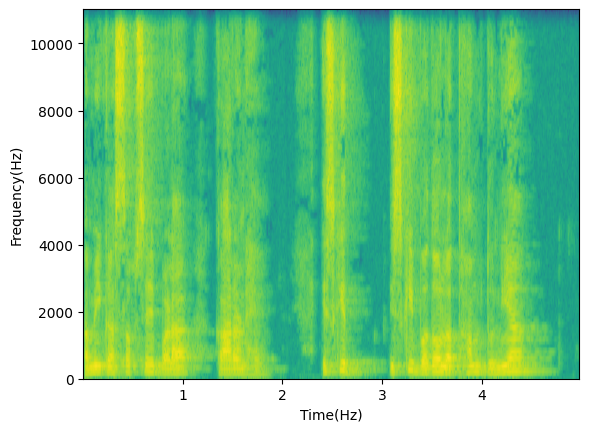

In [10]:
Pxx, freqs, bins, im = plt.specgram(data, Fs=sample_rate)

plt.ylabel('Frequency(Hz)')
plt.xlabel('Time(Hz)')

Text(0.5, 0, 'Time in samples')

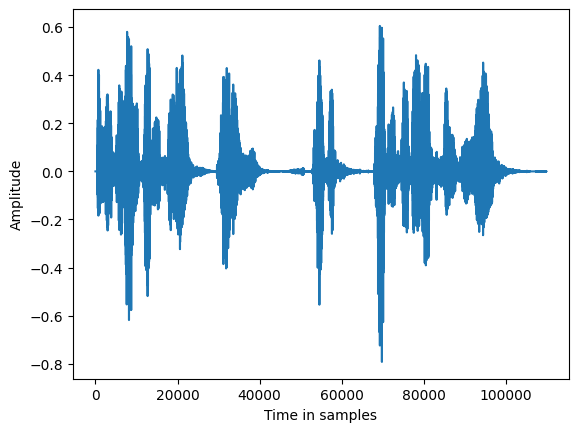

In [11]:
plt.plot(data)

plt.ylabel('Amplitude')
plt.xlabel('Time in samples')

In [12]:
train_size0 = 5000
train_size1 = int(train_size0*0.2)

In [13]:
train_size0+train_size1

6000

In [14]:
label = []
lang0 = []
for filename in os.listdir(Hindi)[:train_size0]:
    label.append(filename[:-4])
    lang0.append('Hindi')
for filename in os.listdir(Bengali)[:train_size1]:
    label.append(filename[:-4])
    lang0.append('Bengali')
for filename in os.listdir(Gujarati)[:train_size1]:
    label.append(filename[:-4])
    lang0.append('Gujarati')
for filename in os.listdir(Kannada)[:train_size1]:
    label.append(filename[:-4])
    lang0.append('Kannada')
for filename in os.listdir(Malayalam)[:train_size1]:
    label.append(filename[:-4])
    lang0.append('Malayalam')
for filename in os.listdir(Marathi)[:train_size1]:
    label.append(filename[:-4])
    lang0.append('Marathi')
for filename in os.listdir(Punjabi)[:train_size1]:
    label.append(filename[:-4])
    lang0.append('Punjabi')
for filename in os.listdir(Kannada)[:train_size1]:
    label.append(filename[:-4])
    lang0.append('Kannada')
for filename in os.listdir(Tamil)[:train_size1]:
    label.append(filename[:-4])
    lang0.append('Tamil')
for filename in os.listdir(Telugu)[:train_size1]:
    label.append(filename[:-4])
    lang0.append('Telugu')
for filename in os.listdir(Urdu)[:train_size1]:
    label.append(filename[:-4])
    lang0.append('Urdu')

In [15]:
len(label),len(lang0)

(11001, 11001)

In [16]:
label_dict = {'Label':label,
              'Language':lang0}

In [17]:
Label = pd.DataFrame(label_dict)
Label = Label.sample(frac=1).reset_index(drop=True)

In [18]:
Label['Language'].value_counts()

Language
Kannada      2000
Hindi        1001
Telugu       1000
Malayalam    1000
Bengali      1000
Tamil        1000
Punjabi      1000
Gujarati     1000
Marathi      1000
Urdu         1000
Name: count, dtype: int64

In [19]:
Label.head()

,Label,Language
0,16027,Telugu
1,5172,Malayalam
2,12959,Bengali
3,18073,Bengali
4,12473,Tamil


In [20]:
label_t = []
lang1 = []
for filename in os.listdir(Hindi)[:int(1.2*train_size0)]:
    label_t.append(filename[:-4])
    lang1.append('Hindi')
for filename in os.listdir(Bengali)[:int(1.2*train_size1)]:
    label_t.append(filename[:-4])
    lang1.append('Bengali')
for filename in os.listdir(Gujarati)[:int(1.2*train_size1)]:
    label_t.append(filename[:-4])
    lang1.append('Gujarati')
for filename in os.listdir(Kannada)[:int(1.2*train_size1)]:
    label_t.append(filename[:-4])
    lang1.append('Kannada')
for filename in os.listdir(Malayalam)[:int(1.2*train_size1)]:
    label_t.append(filename[:-4])
    lang1.append('Malayalam')
for filename in os.listdir(Marathi)[:int(1.2*train_size1)]:
    label_t.append(filename[:-4])
    lang1.append('Marathi')
for filename in os.listdir(Punjabi)[:int(1.2*train_size1)]:
    label_t.append(filename[:-4])
    lang1.append('Punjabi')
for filename in os.listdir(Tamil)[:int(1.2*train_size1)]:
    label_t.append(filename[:-4])
    lang1.append('Tamil')
for filename in os.listdir(Telugu)[:int(1.2*train_size1)]:
    label_t.append(filename[:-4])
    lang1.append('Telugu')
for filename in os.listdir(Urdu)[:int(1.2*train_size1)]:
    label_t.append(filename[:-4])
    lang1.append('Urdu')

In [21]:
len(label_t),len(lang1)

(10002, 10002)

In [22]:
label_t_dict = {'Label':label_t,
                'Language':lang1}

In [23]:
Label_t = pd.DataFrame(label_t_dict)
Label_t = Label_t.sample(frac=1).reset_index(drop=True)

In [24]:
Label_t['Language'].value_counts()

Language
Punjabi      1001
Hindi        1001
Marathi      1000
Bengali      1000
Gujarati     1000
Urdu         1000
Malayalam    1000
Tamil        1000
Kannada      1000
Telugu       1000
Name: count, dtype: int64

In [25]:
Label_t.head()

,Label,Language
0,9224,Marathi
1,6386,Bengali
2,17800,Gujarati
3,3468,Punjabi
4,2222,Urdu


In [26]:
file = []
lang2 = []
for filename in os.listdir(Hindi)[:train_size0]:
    file.append(filename)
    lang2.append('Hindi')
for filename in os.listdir(Bengali)[:train_size1]:
    file.append(filename)
    lang2.append('Bengali')
for filename in os.listdir(Gujarati)[:train_size1]:
    file.append(filename)
    lang2.append('Gujarati')
for filename in os.listdir(Kannada)[:train_size1]:
    file.append(filename)
    lang2.append('Kannada')
for filename in os.listdir(Malayalam)[:train_size1]:
    file.append(filename)
    lang2.append('Malayalam')
for filename in os.listdir(Marathi)[:train_size1]:
    file.append(filename)
    lang2.append('Marathi')
for filename in os.listdir(Punjabi)[:train_size1]:
    file.append(filename)
    lang2.append('Punjabi')
for filename in os.listdir(Tamil)[:train_size1]:
    file.append(filename)
    lang2.append('Tamil')
for filename in os.listdir(Telugu)[:train_size1]:
    file.append(filename)
    lang2.append('Telugu')
for filename in os.listdir(Urdu)[:train_size1]:
    file.append(filename)
    lang2.append('Urdu')    

In [27]:
len(file), len(lang2)


(10001, 10001)

In [28]:
file_dict = {'Filename':file,
             'Language':lang2}

In [29]:
df = pd.DataFrame(file_dict)
df = df.sample(frac=1).reset_index(drop=True)

In [30]:
df['Language'].value_counts()

Language
Hindi        1001
Bengali      1000
Gujarati     1000
Telugu       1000
Tamil        1000
Punjabi      1000
Malayalam    1000
Marathi      1000
Kannada      1000
Urdu         1000
Name: count, dtype: int64

In [31]:
df.head()

,Filename,Language
0,793.mp3,Bengali
1,21385.mp3,Gujarati
2,21724.mp3,Telugu
3,23253.mp3,Tamil
4,17607.mp3,Punjabi


In [32]:
# Saving the DataFrame to a CSV file
df.to_csv('Indian_Languages_Audio_Dataset.csv', index=False)

In [33]:
df = pd.read_csv('Indian_Languages_Audio_Dataset.csv')

In [34]:
df.head()

,Filename,Language
0,793.mp3,Bengali
1,21385.mp3,Gujarati
2,21724.mp3,Telugu
3,23253.mp3,Tamil
4,17607.mp3,Punjabi


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Filename  10001 non-null  object
 1   Language  10001 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


In [36]:
audio_dataset_path = r'Indian_Languages_Audio_Dataset/'
metadata = df

In [37]:
def features_extractor(file):
    audio, sample_rate = libr.load(file_name,res_type='kaiser_fast') 
    mfccs_features = libr.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [38]:
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
language_folders = ['Bengali','Gujarati','Hindi','Kannada','Malayalam','Marathi','Punjabi','Tamil','Telugu','Urdu']
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path)+'/',str(row["Language"])+'/',str(row["Filename"]))
    final_class_labels=row["Language"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

10001it [26:17,  6.34it/s]


In [39]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','Language'])
extracted_features_df.head()

,feature,Language
0,"[-444.1418, 98.66051, -10.080444, 18.105623, -...",Bengali
1,"[-298.48013, 135.21716, -43.819386, 10.518396,...",Gujarati
2,"[-254.31418, 122.540955, -12.213661, 34.03527,...",Telugu
3,"[-282.4621, 168.52794, 23.052904, 25.475897, 1...",Tamil
4,"[-354.39642, 118.19106, -22.453428, 7.9462957,...",Punjabi


In [40]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['Language'].tolist())

In [41]:
X.shape

(10001, 40)

In [42]:
y

array(['Bengali', 'Gujarati', 'Telugu', ..., 'Telugu', 'Bengali', 'Hindi'],
      dtype='<U9')

In [43]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [44]:
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [45]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [46]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 40)
(2001, 40)
(8000, 10)
(2001, 10)


In [47]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [48]:
### No of classes
num_labels=y.shape[1]

In [49]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [51]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [73]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
240/250 [===========================>..] - ETA: 0s - loss: 0.5058 - accuracy: 0.7947
Epoch 1: val_loss improved from inf to 0.37756, saving model to audio_classification.hdf5
250/250 [==============================] - 1s 5ms/step - loss: 0.5072 - accuracy: 0.7944 - val_loss: 0.3776 - val_accuracy: 0.8366
Epoch 2/100
242/250 [============================>.] - ETA: 0s - loss: 0.5121 - accuracy: 0.7998
Epoch 2: val_loss improved from 0.37756 to 0.35112, saving model to audio_classification.hdf5
250/250 [==============================] - 1s 4ms/step - loss: 0.5109 - accuracy: 0.8006 - val_loss: 0.3511 - val_accuracy: 0.8441
Epoch 3/100
243/250 [============================>.] - ETA: 0s - loss: 0.5055 - accuracy: 0.7969
Epoch 3: val_loss improved from 0.35112 to 0.34606, saving model to audio_classification.hdf5
250/250 [==============================] - 1s 4ms/step - loss: 0.5045 - accuracy: 0.7977 - val_loss: 0.3461 - val_accuracy: 0.8451
Epoch 4/100
245/250 [=================

Epoch 30/100
241/250 [===========================>..] - ETA: 0s - loss: 0.4943 - accuracy: 0.7978
Epoch 30: val_loss did not improve from 0.32893
250/250 [==============================] - 1s 5ms/step - loss: 0.4912 - accuracy: 0.7997 - val_loss: 0.3405 - val_accuracy: 0.8521
Epoch 31/100
244/250 [============================>.] - ETA: 0s - loss: 0.4694 - accuracy: 0.8105
Epoch 31: val_loss did not improve from 0.32893
250/250 [==============================] - 1s 5ms/step - loss: 0.4711 - accuracy: 0.8096 - val_loss: 0.3403 - val_accuracy: 0.8466
Epoch 32/100
249/250 [============================>.] - ETA: 0s - loss: 0.4774 - accuracy: 0.8045
Epoch 32: val_loss improved from 0.32893 to 0.32699, saving model to audio_classification.hdf5
250/250 [==============================] - 1s 5ms/step - loss: 0.4774 - accuracy: 0.8040 - val_loss: 0.3270 - val_accuracy: 0.8501
Epoch 33/100
248/250 [============================>.] - ETA: 0s - loss: 0.4955 - accuracy: 0.8014
Epoch 33: val_loss did n

250/250 [==============================] - 1s 4ms/step - loss: 0.4565 - accuracy: 0.8075 - val_loss: 0.3450 - val_accuracy: 0.8506
Epoch 60/100
241/250 [===========================>..] - ETA: 0s - loss: 0.4718 - accuracy: 0.8093
Epoch 60: val_loss did not improve from 0.32699
250/250 [==============================] - 1s 5ms/step - loss: 0.4720 - accuracy: 0.8083 - val_loss: 0.3498 - val_accuracy: 0.8581
Epoch 61/100
241/250 [===========================>..] - ETA: 0s - loss: 0.4522 - accuracy: 0.8156
Epoch 61: val_loss did not improve from 0.32699
250/250 [==============================] - 1s 4ms/step - loss: 0.4555 - accuracy: 0.8152 - val_loss: 0.3669 - val_accuracy: 0.8481
Epoch 62/100
245/250 [============================>.] - ETA: 0s - loss: 0.4726 - accuracy: 0.8082
Epoch 62: val_loss did not improve from 0.32699
250/250 [==============================] - 1s 4ms/step - loss: 0.4737 - accuracy: 0.8075 - val_loss: 0.3589 - val_accuracy: 0.8501
Epoch 63/100
241/250 [================

239/250 [===========================>..] - ETA: 0s - loss: 0.4596 - accuracy: 0.8088
Epoch 89: val_loss did not improve from 0.32699
250/250 [==============================] - 1s 4ms/step - loss: 0.4574 - accuracy: 0.8096 - val_loss: 0.3521 - val_accuracy: 0.8501
Epoch 90/100
244/250 [============================>.] - ETA: 0s - loss: 0.4847 - accuracy: 0.8030
Epoch 90: val_loss did not improve from 0.32699
250/250 [==============================] - 1s 4ms/step - loss: 0.4846 - accuracy: 0.8027 - val_loss: 0.3309 - val_accuracy: 0.8606
Epoch 91/100
246/250 [============================>.] - ETA: 0s - loss: 0.4436 - accuracy: 0.8135
Epoch 91: val_loss did not improve from 0.32699
250/250 [==============================] - 1s 4ms/step - loss: 0.4448 - accuracy: 0.8131 - val_loss: 0.3400 - val_accuracy: 0.8491
Epoch 92/100
241/250 [===========================>..] - ETA: 0s - loss: 0.4705 - accuracy: 0.8074
Epoch 92: val_loss did not improve from 0.32699
250/250 [===========================

In [74]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.853573203086853


In [78]:
# Testing the modle
filename="Indian_Languages_Audio_Dataset/Hindi/15.mp3"
prediction_feature=features_extractor(filename)
prediction_feature=prediction_feature.reshape(1,-1)
model.predict(prediction_feature)

1/1 [==============================] - 0s 31ms/step


array([[1.8331625e-02, 1.3676640e-03, 8.5508692e-01, 1.7027869e-03,
        6.7625032e-04, 7.4311167e-02, 1.6995260e-03, 4.1603539e-04,
        1.0370503e-02, 3.6037441e-02]], dtype=float32)